## Reddit Sentiment Analysis Instructions
In this notebook, we will analyze Reddit posts.

### Step 1: Create a Reddit Account

If you don't already have a Reddit account, you'll need to create one.

### Step 2: Create an App

1. Go to [Reddit Apps](https://www.reddit.com/prefs/apps).
2. Scroll down to the "Developed Applications" section.
3. Click on "Create App" or "Create Another App".
4. Fill out the form:
    - **name**: Choose a name for your app.
    - **App type**: Select "script".
    - **description**: (Optional) Provide a description for your app.
    - **about url**: (Optional) Provide a URL with more information about your app.
    - **redirect uri**: Set this to `http://localhost:8000`
5. Click on "Create app".

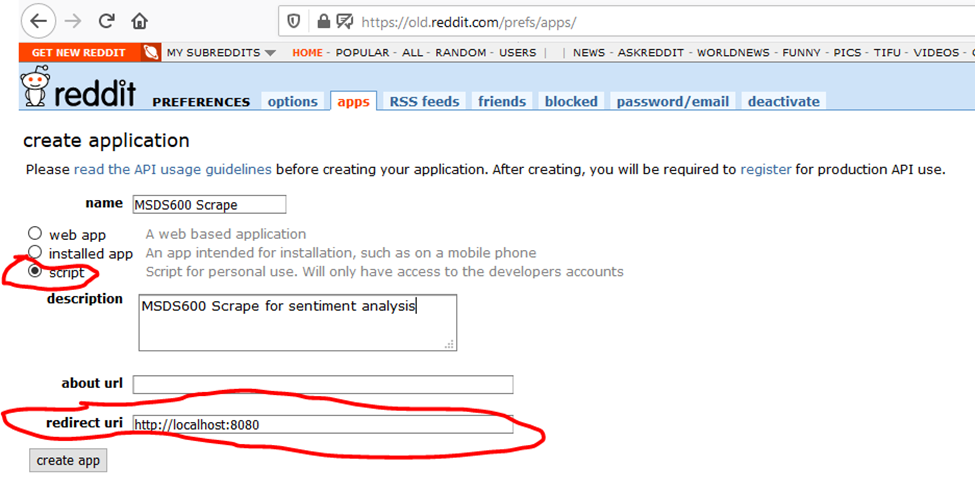

### Step 3: Note Down Your Credentials

After creating the app, you will see your app's details. Note down the following:
- **client ID**: The string under "personal use script".
- **client secret**: The string next to "secret".
- **user agent**: A unique identifier for your app.

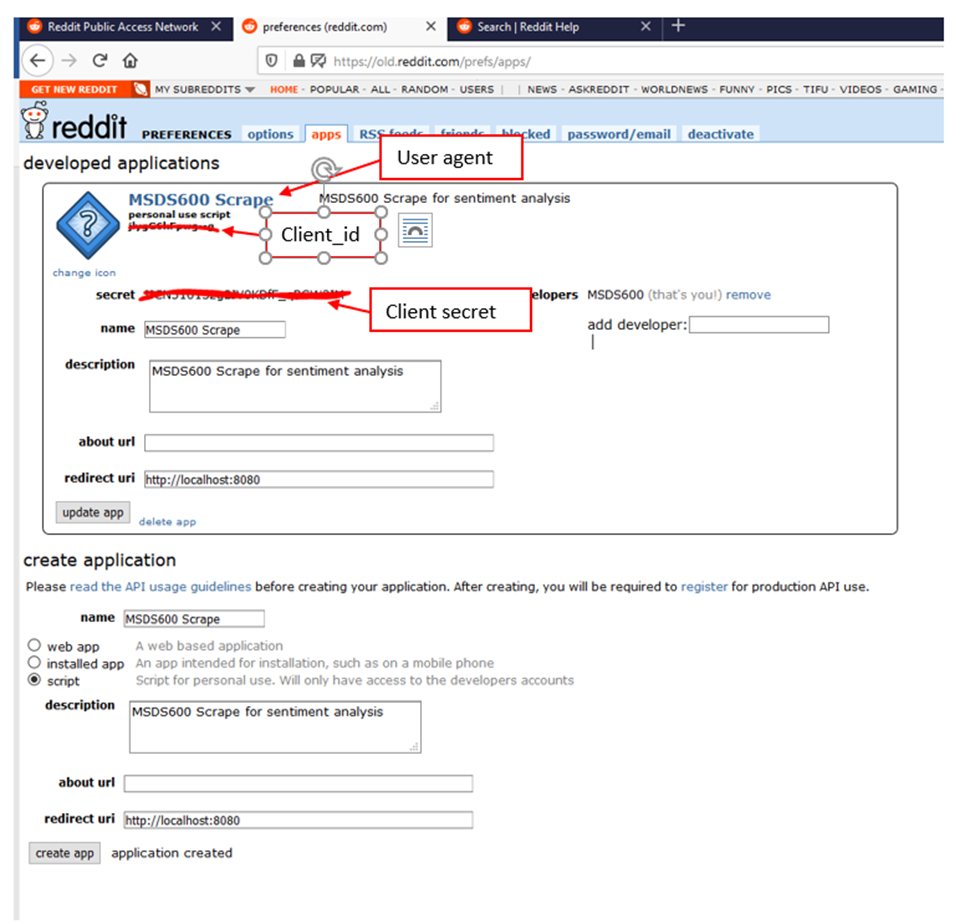

You will use these credentials to authenticate with the Reddit API.

I have saved these credentials in `credentials.py` file with three variables: `client_id`, `client_secret`, and `user_agent`.

### Step 4: Install Required Libraries

The required packages `praw`, `matplotlib`, `wordcloud`, and `textblob` are listed in the `requirements.txt` file. You can install the packages using any of the following command:


In [ ]:
# !pip install -r requirements.txt
# !pip install praw wordcloud matplotlib textblob

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import praw
from wordcloud import WordCloud
from textblob import TextBlob

In [3]:
import credentials
reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)

### Collect Data from Reddit

In [4]:
# Fetch posts from a subreddit (e.g., r/mentalhealth)
subreddit = reddit.subreddit("mentalhealth")
posts = []
for post in subreddit.hot(limit=100):  # Adjust the limit as needed
    posts.append([post.title, post.selftext])

# Convert to DataFrame
df = pd.DataFrame(posts, columns=["Title", "Body"])
df["Content"] = df["Title"] + " " + df["Body"]
df.head()

,Title,Body,Content
0,Elections and Politics,Hello friends!\n\nIt's that time of the year a...,Elections and Politics Hello friends!\n\nIt's ...
1,r/MentalHealth is looking for moderators,Hey r/mentalhealth! We're looking to grow our ...,r/MentalHealth is looking for moderators Hey r...
2,Deleted all of my social media.,Recently life has felt like a chore. My mental...,Deleted all of my social media. Recently life ...
3,Can a diagnosis make you a bad person?,"I’m 21(f) and I’ve been diagnosed with OCD, BP...",Can a diagnosis make you a bad person? I’m 21(...
4,I hate my existence and everything about it.,"I am 26 now and live in Pakistan, obviously wa...",I hate my existence and everything about it. I...


### Clean and Preprocess the Data

In [5]:
# Function to clean text
def clean_text(text):
    text = re.sub(r"http\S+|www\S+", '', text)  # Remove URLs
    text = re.sub(r'\W', ' ', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    return text

df["Cleaned_Content"] = df["Content"].apply(clean_text)
df.head()

,Title,Body,Content,Cleaned_Content
0,Elections and Politics,Hello friends!\n\nIt's that time of the year a...,Elections and Politics Hello friends!\n\nIt's ...,elections and politics hello friends it s th...
1,r/MentalHealth is looking for moderators,Hey r/mentalhealth! We're looking to grow our ...,r/MentalHealth is looking for moderators Hey r...,r mentalhealth is looking for moderators hey r...
2,Deleted all of my social media.,Recently life has felt like a chore. My mental...,Deleted all of my social media. Recently life ...,deleted all of my social media recently life ...
3,Can a diagnosis make you a bad person?,"I’m 21(f) and I’ve been diagnosed with OCD, BP...",Can a diagnosis make you a bad person? I’m 21(...,can a diagnosis make you a bad person i m 21 ...
4,I hate my existence and everything about it.,"I am 26 now and live in Pakistan, obviously wa...",I hate my existence and everything about it. I...,i hate my existence and everything about it i...


### Generate a Bar Chart of Word Frequencies

Top 10 Words and Their Frequencies:


,Word,Frequency
0,i,1398
1,to,699
2,and,686
3,my,503
4,a,462
5,the,446
6,of,309
7,it,305
8,that,251
9,me,246


C:\Users\mujtaba\AppData\Local\Temp\ipykernel_11400\2732408534.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Word", data=word_freq, palette="viridis")


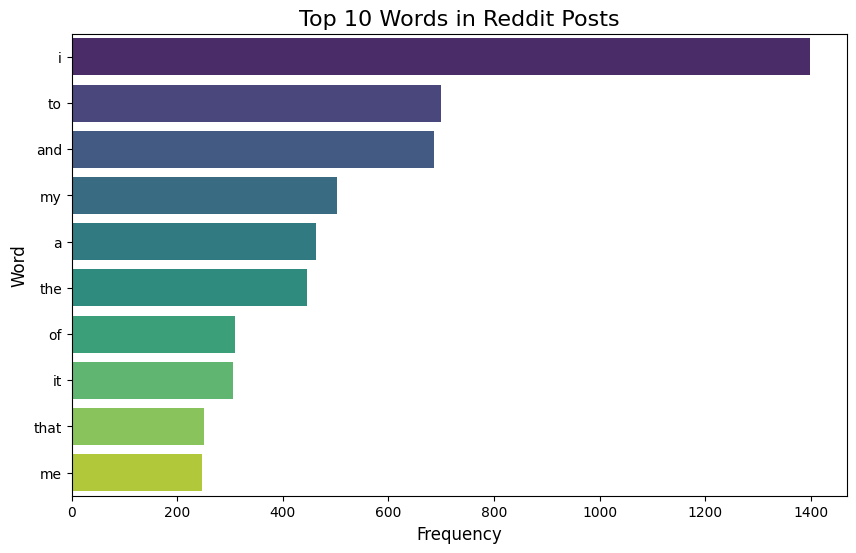

In [6]:
# Tokenize and count words
all_words = ' '.join(df["Cleaned_Content"]).split()
word_counts = Counter(all_words)

# Create a DataFrame of word frequencies
word_freq = pd.DataFrame(word_counts.most_common(10), columns=["Word", "Frequency"])

# Display the DataFrame
print("Top 10 Words and Their Frequencies:")
display(word_freq)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Frequency", y="Word", data=word_freq, palette="viridis")
plt.title("Top 10 Words in Reddit Posts", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.show()

### Generate a Word Cloud

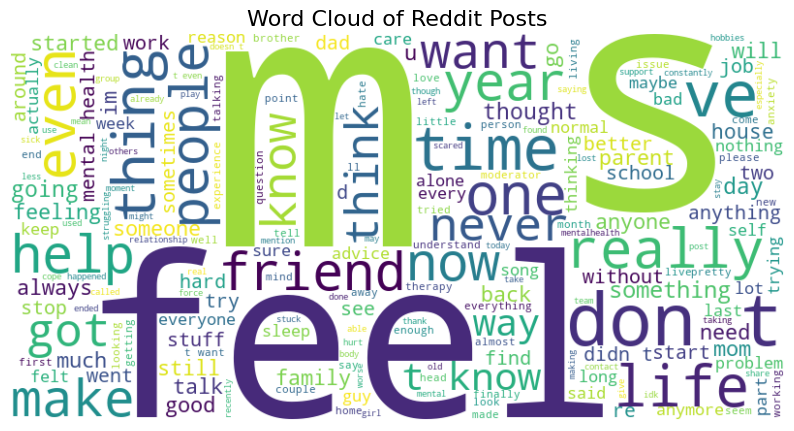

In [7]:
# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(' '.join(all_words))

# Display word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reddit Posts", fontsize=16)
plt.show()

### Conduct Sentiment Analysis

C:\Users\mujtaba\AppData\Local\Temp\ipykernel_11400\237199099.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment_Label", data=df, palette="coolwarm")


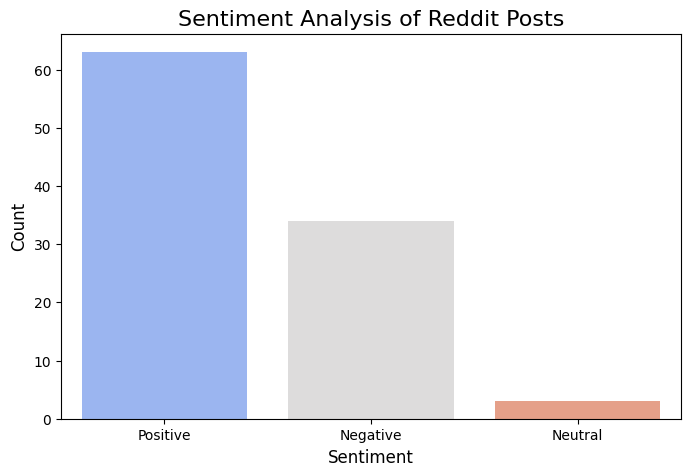

In [8]:
# Add sentiment scores
df["Sentiment"] = df["Cleaned_Content"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["Sentiment_Label"] = df["Sentiment"].apply(lambda x: "Positive" if x > 0 else "Negative" if x < 0 else "Neutral")

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Sentiment_Label", data=df, palette="coolwarm")
plt.title("Sentiment Analysis of Reddit Posts", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()